<a href="https://colab.research.google.com/github/ranasweta/AI_Project_4th_Sem/blob/main/LSTM_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas numpy tensorflow scikit-learn matplotlib seaborn imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE



In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
if df.isnull().sum().sum() > 0:
    print("Warning: Dataset contains missing values!")

In [ ]:
df['Class'].fillna(df['Class'].mean(), inplace=True)

<ipython-input-5-745ee96a18dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].fillna(df['Class'].mean(), inplace=True)


In [ ]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

In [ ]:
if 'Time' in df.columns:
    df.drop("Time", axis=1, inplace=True)
else:
    print("Column 'Time' not found in DataFrame.")

In [ ]:
df['Class'] = df['Class'].astype(int)


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X = X.values.reshape(X.shape[0], 1, X.shape[1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Impute missing values using SimpleImputer before applying SMOTE
from sklearn.impute import SimpleImputer

# Reshape X_train and X_test to 2D before imputation
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2]) # Reshape to 2D for SMOTE
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2]) # Reshape to 2D for SMOTE


# Create an imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now apply SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Reshape X_train and X_test back to 3D after SMOTE if necessary for your model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]) # Reshape back to 3D if your model requires it
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]) # Reshape back to 3D if your model requires it

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Output layer (binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9800 - loss: 0.2282 - val_accuracy: 0.9965 - val_loss: 0.0176
Epoch 2/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9986 - loss: 0.0074 - val_accuracy: 0.9967 - val_loss: 0.0106
Epoch 3/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.9965 - val_loss: 0.0162
Epoch 4/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9977 - val_loss: 0.0137
Epoch 5/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9982 - val_loss: 0.0145
Epoch 6/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9977 - val_loss: 0.0139
Epoch 7/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9980 - val_loss: 0.0152
Epoch 8/20
545/545 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

🔹 Accuracy: 0.9982
🔹 Precision: 0.7778
🔹 Recall: 0.8235
🔹 F1 Score: 0.8000


In [ ]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3963
           1       0.78      0.82      0.80        17

    accuracy                           1.00      3980
   macro avg       0.89      0.91      0.90      3980
weighted avg       1.00      1.00      1.00      3980



In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


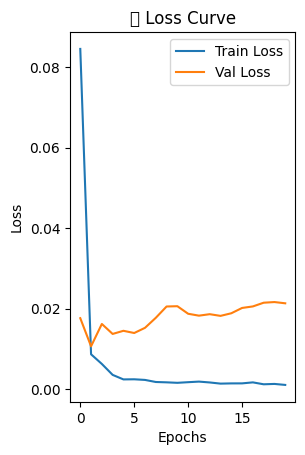

In [ ]:
# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("📉 Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


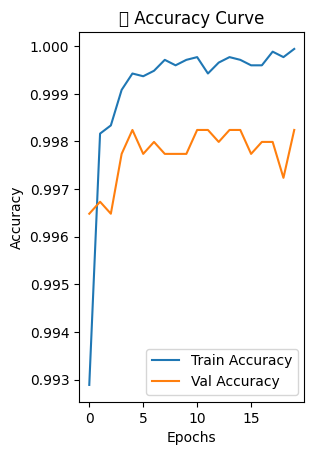

In [ ]:
# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("📈 Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()